In [1]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
st = LancasterStemmer()
 
# Create Snowball stemmer
snow_stemmer = SnowballStemmer(language='english')

# Create a Porter Stemmer instance
porter_stemmer = PorterStemmer()

# Create a Lancaster Stemmer instance
lancaster_stemmer = LancasterStemmer()

# Example words for stemming
words = ["running", "jumps", "happily", "programming", 'cared','fairly','sportingly']

# Apply stemming to each word
stemmed_words = [porter_stemmer.stem(word) for word in words]
print("===Porter===:")
print("Original words:", words)
print("Stemmed words:", stemmed_words)

print("\n===Snowball===:")
stemmed_words = [snow_stemmer.stem(word) for word in words]
print("Porter:")
print("Original words:", words)
print("Stemmed words:", stemmed_words)

print("\n===Lancaster===:")
stemmed_words = [lancaster_stemmer.stem(word) for word in words]
print("Porter:")
print("Original words:", words)
print("Stemmed words:", stemmed_words)

===Porter===:
Original words: ['running', 'jumps', 'happily', 'programming', 'cared', 'fairly', 'sportingly']
Stemmed words: ['run', 'jump', 'happili', 'program', 'care', 'fairli', 'sportingli']

===Snowball===:
Porter:
Original words: ['running', 'jumps', 'happily', 'programming', 'cared', 'fairly', 'sportingly']
Stemmed words: ['run', 'jump', 'happili', 'program', 'care', 'fair', 'sport']

===Lancaster===:
Porter:
Original words: ['running', 'jumps', 'happily', 'programming', 'cared', 'fairly', 'sportingly']
Stemmed words: ['run', 'jump', 'happy', 'program', 'car', 'fair', 'sport']


### Завдання 1

In [27]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
english = stopwords.words('english')
english

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kleot\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

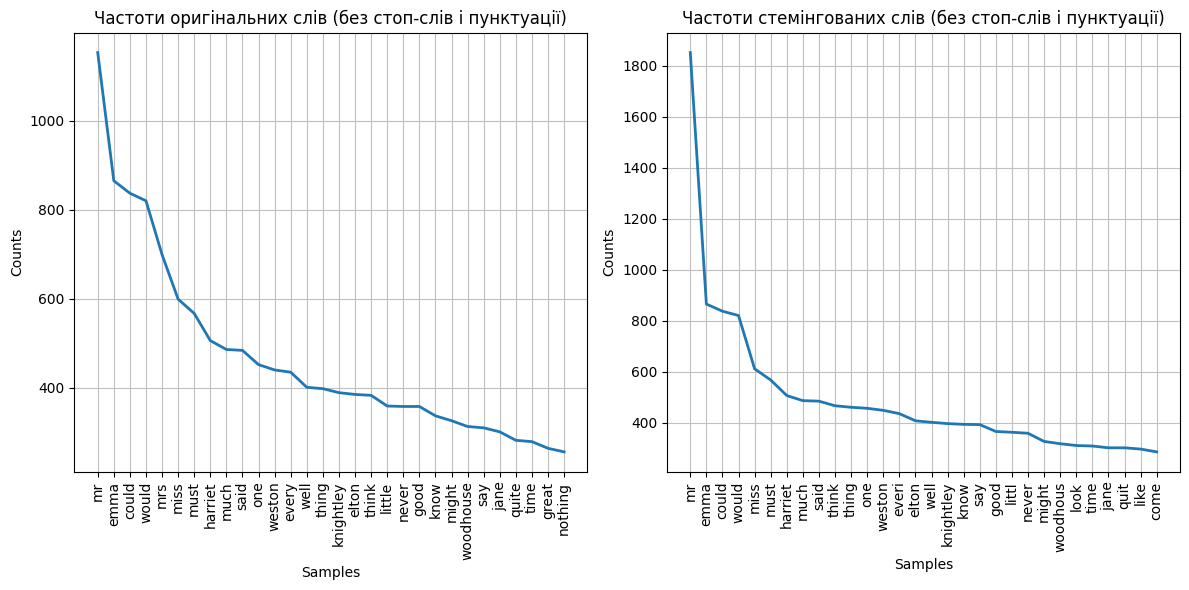

In [2]:
import nltk
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
import re
import matplotlib.pyplot as plt


words = nltk.corpus.gutenberg.words('austen-emma.txt')

# Очищаємо текст: видаляємо пунктуацію (включаючи лапки) і приводимо до нижнього регістру
cleaned_words = [word.lower() for word in words if re.match(r'^\w+$', word)]

# Отримуємо список англійських стоп-слів
stopwords = nltk.corpus.stopwords.words('english')

# Фільтруємо слова, виключаючи стоп-слова
filtered_words = [word for word in cleaned_words if word not in stopwords]

# Частоти оригінальних слів (без стемінгу, але з очищенням)
fdist_original = FreqDist(filtered_words)

# Стемінг відфільтрованих слів
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]
fdist_stemmed = FreqDist(stemmed_words)

# Створюємо графіки
plt.figure(figsize=(12, 6))

# Графік для оригінальних слів
plt.subplot(1, 2, 1)
fdist_original.plot(30, title="Частоти оригінальних слів (без стоп-слів і пунктуації)")

# Графік для стемінгованих слів
plt.subplot(1, 2, 2)
fdist_stemmed.plot(30, title="Частоти стемінгованих слів (без стоп-слів і пунктуації)")

plt.tight_layout()  # Налаштовуємо макет, щоб уникнути перекриття
plt.show()

### Завдання 2

In [3]:
import re
from nltk.stem.api import StemmerI

class UkrainianStemmer(StemmerI):
    def __init__(self):
        self.suffixes = re.compile(r'(ами|ями|еві|ові|єві|ями|ий|ій|а|я|о|е|у|ю|і|ї|є|ей|ою|ий|ом|ем|ім|ам|ем|ом)$')

    def stem(self, word):
        return self.suffixes.sub('', word)

# Тестування стемера
if __name__ == "__main__":
    words = ["машини", "столи", "друзі", "казками", "птахові", "морями"]
    stemmer = UkrainianStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    
    print("Original words: ", words)
    print("Stemmed words: ", stemmed_words)


Original words:  ['машини', 'столи', 'друзі', 'казками', 'птахові', 'морями']
Stemmed words:  ['машини', 'столи', 'друз', 'казк', 'птах', 'мор']


In [8]:
import re
from nltk.stem.api import StemmerI

class UkrainianStemmer(StemmerI):
    def __init__(self):
        self.suffixes = re.compile(r'(ість|ими|ами|ючи|ими|ого|ому|ання|ати|ими|ій|ий|а|о|у|и|і|е|є|ю|ям|ях|ти|ть|ться)$')

    def stem(self, word):
        return self.suffixes.sub('', word)

# Тестування стемера
stemmer = UkrainianStemmer()
words = ["книга", "книги", "книгами", "читання", "читати", "читаючи"]
stemmed_words = [stemmer.stem(word) for word in words]
print("Результати стемінгу:", list(zip(words, stemmed_words)))

Результати стемінгу: [('книга', 'книг'), ('книги', 'книг'), ('книгами', 'книг'), ('читання', 'чит'), ('читати', 'чит'), ('читаючи', 'чита')]


In [9]:
from nltk.stem import RegexpStemmer

st = RegexpStemmer('(ини|ами|ями|еві|ові|єві|ями|ий|ій|а|я|о|е|у|ю|і|ї|є|ей|ою|ий|ом|ем|ім|ам|ем|ом)$', min=4)
    
print(st.stem("машини"))
print(st.stem("столи"))
print(st.stem("друзі"))
print(st.stem("казками"))
print(st.stem("птахові"))
print(st.stem("морями"))

маш
столи
друз
казк
птах
мор


### Завдання 3

In [29]:
import numpy as np

class DamerauLevenshtein:
    def __init__(self) -> None:
        # Мапа близькості символів на QWERTY
        self.qwerty_costs: dict[tuple[str, str], float] = {
            ('q', 'w'): 1, ('w', 'e'): 1, ('e', 'r'): 1, ('r', 't'): 1, ('t', 'y'): 1, 
            ('y', 'u'): 1, ('u', 'i'): 1, ('i', 'o'): 1, ('o', 'p'): 1,
            ('a', 's'): 1, ('s', 'd'): 1, ('d', 'f'): 1, ('f', 'g'): 1, ('g', 'h'): 1,
            ('h', 'j'): 1, ('j', 'k'): 1, ('k', 'l'): 1,
            ('z', 'x'): 1, ('x', 'c'): 1, ('c', 'v'): 1, ('v', 'b'): 1, ('b', 'n'): 1, 
            ('n', 'm'): 1
        }
    
    def qwerty_distance(self, a: str, b: str) -> float:
        """Розраховує вартість заміни символів на основі відстані на клавіатурі."""
        if a == b:
            return 0.0
        elif (a, b) in self.qwerty_costs or (b, a) in self.qwerty_costs:
            return 0.5  # Ближні символи коштують дешевше
        else:
            return 1.0  # Стандартна заміна
    
    def calculate(self, s1: str, s2: str) -> float:
        """Обчислює Damerau-Levenshtein відстань між двома рядками."""
        len_s1, len_s2 = len(s1), len(s2)
        dp: np.ndarray = np.zeros((len_s1 + 1, len_s2 + 1), dtype=float)

        # Ініціалізація матриці
        for i in range(len_s1 + 1):
            dp[i][0] = i
        for j in range(len_s2 + 1):
            dp[0][j] = j

        # Заповнення матриці
        for i in range(1, len_s1 + 1):
            for j in range(1, len_s2 + 1):
                cost: float = self.qwerty_distance(s1[i - 1], s2[j - 1])
                dp[i][j] = min(
                    dp[i - 1][j] + 1,  # Видалення
                    dp[i][j - 1] + 1,  # Вставка
                    dp[i - 1][j - 1] + cost  # Заміна
                )

                # Транспозиція (якщо символи переставлені місцями)
                if i > 1 and j > 1 and s1[i - 1] == s2[j - 2] and s1[i - 2] == s2[j - 1]:
                    transposition_cost = self.qwerty_distance(s1[i - 2], s2[j - 2])
                    dp[i][j] = min(dp[i][j], dp[i - 2][j - 2] + transposition_cost)
        
        return dp[len_s1][len_s2]

distance_calculator = DamerauLevenshtein()

word1, word2 = "hello", "helo"
print(f"Damerau-Levenshtein distance між '{word1}' та '{word2}':", distance_calculator.calculate(word1, word2))

word1, word2 = "kitten", "sitting"
print(f"Damerau-Levenshtein distance між '{word1}' та '{word2}':", distance_calculator.calculate(word1, word2))


Damerau-Levenshtein distance між 'hello' та 'helo': 1.0
Damerau-Levenshtein distance між 'kitten' та 'sitting': 3.0
